<a href="https://colab.research.google.com/github/HaingChin/ml-mini-projects/blob/main/mini-projects/House_Price_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction using TensorFlow
This project uses the California Housing Dataset to predict house prices based on multiple features. We'll use linear regression with tensor flow to build a simple predictive model.

# Setup Libraries and Load Muti-Feature Data

In [4]:
# Import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Load California housing data
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Load the data
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="Price")

In [5]:
# Select multiple relevant features
features = ['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'Longitude']
X = X[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to TensorFlow tensors
X_scaled = tf.constant(X_scaled, dtype=tf.float32)
y = tf.constant(y.values, dtype=tf.float32)
y = tf.reshape(y, (-1, 1))  # Reshape to column vector

In [8]:
# Initialize model parameters (weights and bias)
num_features = X_scaled.shape[1]  # Number of input features

# Initialize weights (w) and bias (b)
w = tf.Variable(
    tf.random.normal(shape=(num_features, 1), dtype=tf.float32),
    name='weights'
)
b = tf.Variable(
    tf.zeros(shape=(1, 1), dtype=tf.float32),
    name='bias'
)

# Define the linear regression model
def model(X):
    return tf.matmul(X, w) + b  # Matrix multiplication for X*w then add bias

# Test the model shape (should match y's shape)
print("Model output shape:", model(X_scaled).shape)
print("True y shape:", y.shape)

Model output shape: (20640, 1)
True y shape: (20640, 1)


In [9]:
def compute_cost(y_pred, y_true):
    """
    Computes Mean Squared Error (MSE) cost function.

    Args:
        y_pred: Predicted values (from model)
        y_true: True target values (actual prices)

    Returns:
        cost: Scalar value representing average error
    """
    m = y_true.shape[0]  # Number of training examples

    # Calculate squared error = (y_pred - y_true)^2
    squared_error = tf.square(y_pred - y_true)

    # Compute mean (average) of squared errors
    cost = tf.reduce_sum(squared_error) / (2 * m)

    return cost

In [10]:
# Test with random predictions (before training)
y_pred_random = model(X_scaled)  # Uses initial random w and b
initial_cost = compute_cost(y_pred_random, y)

print("Initial cost (should be high):", initial_cost.numpy())

Initial cost (should be high): 5.409814


In [11]:
# Hyperparameters
learning_rate = 0.01
epochs = 1000  # Number of iterations

# Lists to track progress
cost_history = []

# Training loop
for epoch in range(epochs):
    # Forward pass (compute predictions)
    with tf.GradientTape() as tape:
        y_pred = model(X_scaled)  # Same as X_scaled @ w + b
        cost = compute_cost(y_pred, y)  # Compute MSE

    # Backward pass (compute gradients)
    gradients = tape.gradient(cost, [w, b])

    # Extract gradients
    dw, db = gradients

    # Update weights (gradient descent step)
    w.assign(w - learning_rate * dw)
    b.assign(b - learning_rate * db)

    # Track cost
    cost_history.append(cost.numpy())

    # Print progress every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Cost: {cost.numpy():.4f}")

Epoch 0, Cost: 5.4098
Epoch 100, Cost: 0.9160
Epoch 200, Cost: 0.4027
Epoch 300, Cost: 0.3184
Epoch 400, Cost: 0.2995
Epoch 500, Cost: 0.2933
Epoch 600, Cost: 0.2900
Epoch 700, Cost: 0.2876
Epoch 800, Cost: 0.2855
Epoch 900, Cost: 0.2838


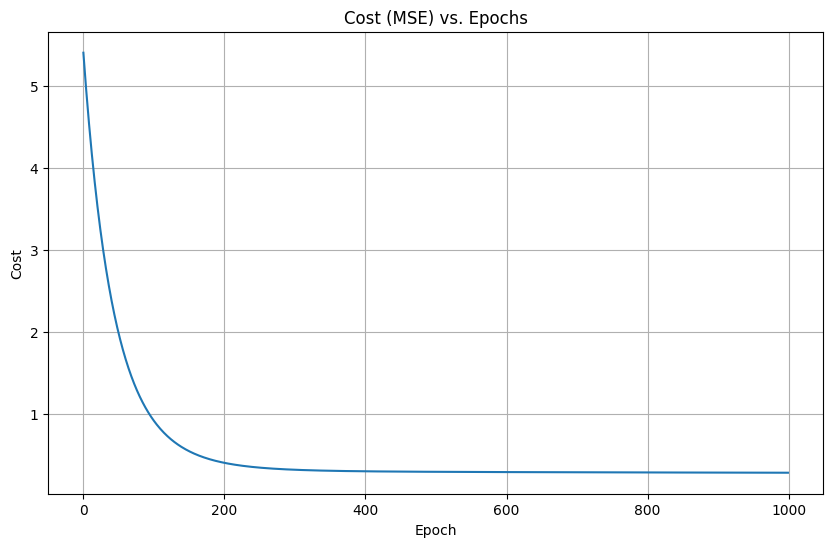

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(cost_history)
plt.title("Cost (MSE) vs. Epochs")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

In [13]:
# Get final predictions
final_predictions = model(X_scaled)

# Compare first 5 predicted vs actual prices
print("Sample Predictions vs Actual:")
for i in range(5):
    print(f"Predicted: {final_predictions[i].numpy()[0]:.2f}, Actual: {y[i].numpy()[0]:.2f}")

Sample Predictions vs Actual:
Predicted: 4.13, Actual: 4.53
Predicted: 3.85, Actual: 3.59
Predicted: 3.84, Actual: 3.52
Predicted: 3.20, Actual: 3.41
Predicted: 2.47, Actual: 3.42


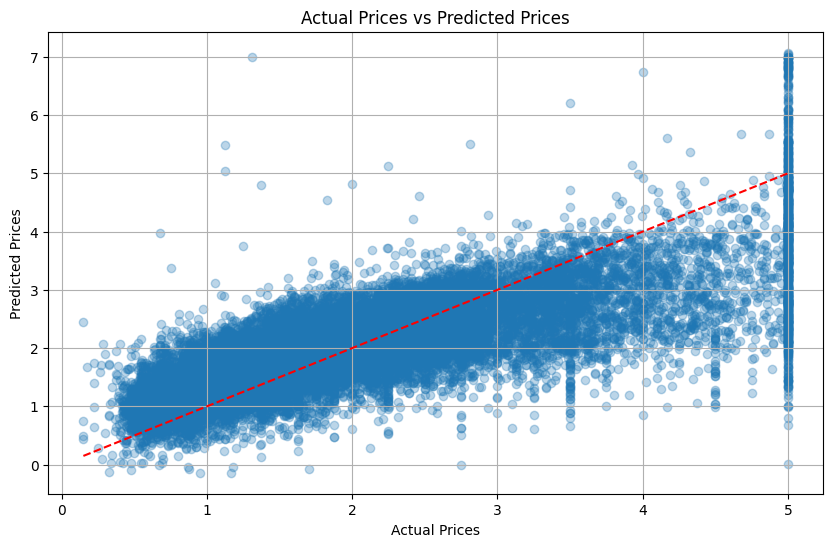

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y, final_predictions, alpha=0.3)


min_val = float(tf.reduce_min(y))
max_val = float(tf.reduce_max(y))
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.title("Actual Prices vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid(True)
plt.show()

In [16]:
from sklearn.metrics import mean_absolute_error, r2_score

# Convert tensors to numpy
y_true = y.numpy()
y_pred = final_predictions.numpy()

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"\nModel Performance Metrics:")
print(f"- Mean Absolute Error: ${mae*100000:.2f}")
print(f"- R-squared Score: {r2:.4f}")


Model Performance Metrics:
- Mean Absolute Error: $55269.20
- R-squared Score: 0.5761


In [17]:
# Example new house data (MedInc, HouseAge, AveRooms, Latitude, Longitude)
new_houses = np.array([
    [8.0, 25, 6, 34.5, -118.2],  # High income, older house
    [3.0, 5, 4, 36.5, -119.1]     # Low income, new house
])

# Scale the new data using the same scaler
new_houses_scaled = scaler.transform(new_houses)

# Convert to tensor and predict
new_houses_tensor = tf.constant(new_houses_scaled, dtype=tf.float32)
predictions = model(new_houses_tensor)

print("\nNew House Predictions:")
for i, price in enumerate(predictions.numpy()):
    print(f"House {i+1}: ${price[0]*100000:.2f}")


New House Predictions:
House 1: $364597.91
House 2: $108093.41


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
